##### Name: Kavya Gengedulla Yeranarasappa
##### Github username: kavyagy
##### USC ID: 3206274199

## Loading the Dataset

In [1]:
import pandas as pd
from scipy.stats import f_oneway

# Load the dataset
data = pd.read_csv("data.csv")
data = data.drop(columns=['Qualified','Filename','Image #'])
data.head()

,Gender,Race,Confident,Egotistic,Intelligent,Kind,Responsible,Trustworthy,Aggressive,Caring,Emotional,Friendly,Sociable
0,1,1,5.67,3.67,5.60,5.00,5.80,5.33,4.80,4.67,3.67,4.33,4.67
1,0,1,6.53,2.20,6.60,7.00,7.47,6.73,3.13,6.93,5.80,6.73,6.60
2,1,1,6.07,3.60,6.47,6.47,6.67,6.40,2.40,6.07,5.14,6.67,6.67
3,1,2,4.80,4.60,4.47,3.80,4.27,3.87,5.80,3.53,2.80,2.93,3.27
4,1,6,6.67,5.40,6.33,4.87,5.87,4.67,4.27,4.07,4.80,5.20,5.33


## 1) Finding Racial Biases using ANOVA test 

In [2]:
import pandas as pd
from scipy.stats import f_oneway

# Drop non-numeric columns (Filename, Image #, Gender)
numeric_data = data.drop(columns=['Gender'])

# Filter race groups to include only races 1, 2, and 3
desired_races = [1, 2, 3]
race_groups = numeric_data[numeric_data['Race'].isin(desired_races)].groupby('Race')

# Calculate mean and median for each trait across racial groups
means = race_groups.mean()
medians = race_groups.median()

# Print means for each race
print("Means for each Race:")
print(means.to_string())
print("\n")

# Print medians for each race
print("\nMedians for each Race:")
print(medians.to_string())

Means for each Race:
      Confident  Egotistic  Intelligent      Kind  Responsible  Trustworthy  Aggressive    Caring  Emotional  Friendly  Sociable
Race                                                                                                                            
1      5.925109   4.057195     5.863676  5.715496     5.905479     5.645065    3.636961  5.580169   4.869951  5.867516  5.851906
2      5.967909   4.322545     5.528636  5.404500     5.514227     5.346682    4.128409  5.305455   4.732318  5.498636  5.647455
3      5.836190   3.604444     6.317937  5.857302     6.146032     5.866508    3.217619  5.751429   4.845238  6.043333  5.830635



Medians for each Race:
      Confident  Egotistic  Intelligent   Kind  Responsible  Trustworthy  Aggressive  Caring  Emotional  Friendly  Sociable
Race                                                                                                                       
1          6.03       4.00         6.00  5.930         6.07 

In [3]:

# Perform one-way ANOVA test for each trait
traits = ['Confident', 'Egotistic', 'Intelligent', 'Kind', 'Responsible', 'Trustworthy', 'Aggressive', 'Caring', 'Emotional', 'Friendly', 'Sociable']
anova_results = {}

# Perform one-way ANOVA for each trait
p_values = {}
for trait in traits:
    f_stat, p_value = f_oneway(*(group[trait] for name, group in race_groups))
    p_values[trait] = p_value

# Identify and report biases
significant_biases_race = {trait: p_value for trait, p_value in p_values.items() if p_value < 0.05}
print("Significant biases :")
for trait, p_value in significant_biases_race.items():
    print(f"Trait: {trait}, p-value: {p_value}")



Significant biases :
Trait: Egotistic, p-value: 1.4412211501758323e-07
Trait: Intelligent, p-value: 1.6711926732092035e-15
Trait: Kind, p-value: 0.00012878104123732718
Trait: Responsible, p-value: 8.005057161350754e-11
Trait: Trustworthy, p-value: 3.672594877204227e-06
Trait: Aggressive, p-value: 2.7078370672104353e-11
Trait: Caring, p-value: 0.00041893692225684995
Trait: Emotional, p-value: 0.02319487807768113
Trait: Friendly, p-value: 4.9774464052824096e-05
Trait: Sociable, p-value: 0.03449616164486741


## 2) Finding Gender Biases using t-test

In [4]:
import pandas as pd
from scipy.stats import f_oneway

# Drop non-numeric columns (Filename, Image #, Gender)
numeric_data = data.drop(columns=['Race'])

# Group the data by race
gender_groups = numeric_data.groupby('Gender')

# Calculate mean and median for each trait across racial groups
means = gender_groups.mean()
medians = gender_groups.median()

# Print means for each race
print("Means for each Gender:")
print(means.to_string())
print("\n")

# Print medians for each race
print("\nMedians for each Gender:")
print(medians.to_string())

Means for each Gender:
        Confident  Egotistic  Intelligent      Kind  Responsible  Trustworthy  Aggressive    Caring  Emotional  Friendly  Sociable
Gender                                                                                                                            
0        5.994449   3.601511     5.947671  6.172770     6.118059     6.008562    3.127545  6.081123   5.289098  6.314092  6.257156
1        5.865760   4.432829     5.752246  5.303822     5.667762     5.309094    4.110788  5.139165   4.528345  5.450024  5.488266



Medians for each Gender:
        Confident  Egotistic  Intelligent  Kind  Responsible  Trustworthy  Aggressive  Caring  Emotional  Friendly  Sociable
Gender                                                                                                                      
0            6.13        3.5         6.00  6.33         6.20         6.13        3.00    6.27       5.33      6.53      6.40
1            5.93        4.4         5.87  5.53   

In [5]:
from scipy.stats import ttest_ind

# Group the data by gender
gender_groups = data.groupby('Gender')
numeric_data = data.drop(columns=['Gender','Race'])

# Perform two-sample t-test for each trait
p_values_gender = {}
for trait in numeric_data.columns:
    group1 = gender_groups.get_group(0)[trait]
    group2 = gender_groups.get_group(1)[trait]
    _, p_value = ttest_ind(group1, group2)
    p_values_gender[trait] = p_value

# Identify and report biases
significant_biases_gender = {trait: p_value for trait, p_value in p_values_gender.items() if p_value < 0.05}
print("Significant biases for gender:")
for trait, p_value in significant_biases_gender.items():
    print(f"Trait: {trait}, p-value: {p_value}")


Significant biases for gender:
Trait: Confident, p-value: 0.0002490671279198179
Trait: Egotistic, p-value: 5.724535735483598e-103
Trait: Intelligent, p-value: 6.617541566954897e-10
Trait: Kind, p-value: 3.6772754632964984e-84
Trait: Responsible, p-value: 5.314276336798082e-34
Trait: Trustworthy, p-value: 5.706506511591532e-73
Trait: Aggressive, p-value: 6.29311355462135e-101
Trait: Caring, p-value: 6.745136923994714e-105
Trait: Emotional, p-value: 1.029377924430242e-164
Trait: Friendly, p-value: 3.7108186188491455e-64
Trait: Sociable, p-value: 3.1946748840509533e-62


## 3) Top 5 most significant biases from both race and gender 

In [6]:
# Combine the significant biases from race and gender
combined_biases = dict(sorted({**significant_biases_race, **significant_biases_gender}.items(), key=lambda x: x[1])[:5])

# Print the results
print("Top 5 Most Significant Biases (Combined Race and Gender):")
for trait, p_value in combined_biases.items():
    print(f"Trait: {trait}, p-value: {p_value}")

Top 5 Most Significant Biases (Combined Race and Gender):
Trait: Emotional, p-value: 1.029377924430242e-164
Trait: Caring, p-value: 6.745136923994714e-105
Trait: Egotistic, p-value: 5.724535735483598e-103
Trait: Aggressive, p-value: 6.29311355462135e-101
Trait: Kind, p-value: 3.6772754632964984e-84


## 4) Histograms for the most significant biases

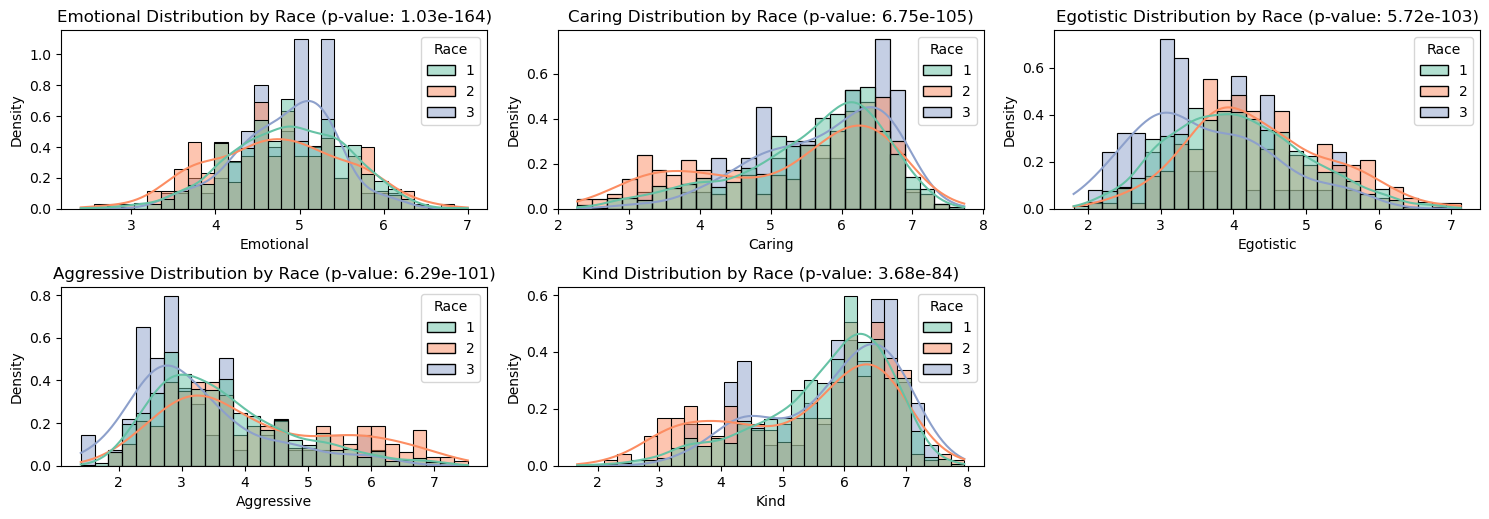

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Filter the data to include only races 1, 2, and 3
desired_races = [1, 2, 3]
filtered_data = data[data['Race'].isin(desired_races)]

# Plot histograms for race
plt.figure(figsize=(15, 10))

# Determine the number of subplots needed
num_biases = len(significant_biases_race)
num_rows = (num_biases - 1) // 3 + 1  # Calculate the number of rows
num_cols = min(num_biases, 3)  # Maximum 3 columns

for i, (bias, p_value) in enumerate(combined_biases.items(), start=1):
    plt.subplot(num_rows, num_cols, i)  # Dynamically determine the subplot position
    sns.histplot(filtered_data, x=bias, hue='Race', kde=True, palette='Set2', stat='density', common_norm=False)
    plt.title(f"{bias} Distribution by Race (p-value: {p_value:.2e})")

plt.tight_layout()
plt.show()


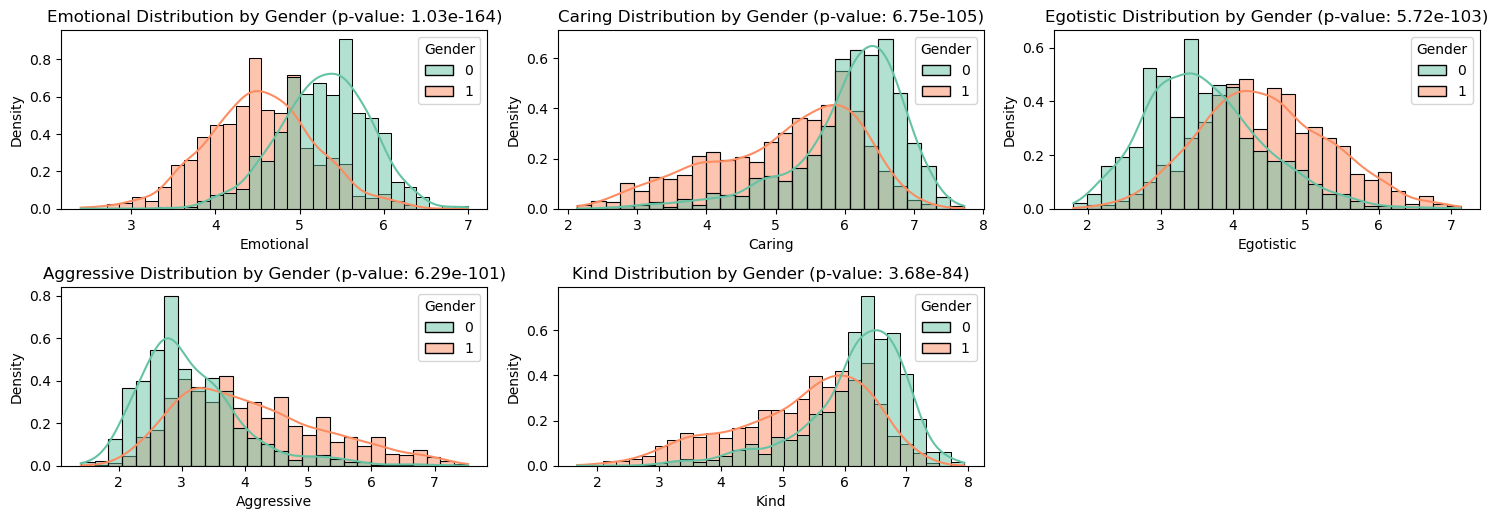

In [8]:
# Plot histograms for gender
plt.figure(figsize=(15, 10))

# Determine the number of subplots needed
num_biases_gender = len(significant_biases_gender)
num_rows_gender = (num_biases_gender - 1) // 3 + 1  # Calculate the number of rows
num_cols_gender = min(num_biases_gender, 3)  # Maximum 3 columns

for i, (bias_gender, p_value_gender) in enumerate(combined_biases.items(), start=1):
    plt.subplot(num_rows_gender, num_cols_gender, i)  # Dynamically determine the subplot position
    sns.histplot(data, x=bias_gender, hue='Gender', kde=True, palette='Set2', stat='density', common_norm=False)
    plt.title(f"{bias_gender} Distribution by Gender (p-value: {p_value_gender:.2e})")

plt.tight_layout()
plt.show()

## 5) Finding possible adversities using the four-fifth rule

In [9]:
import pandas as pd

# Load the dataset
data = pd.read_csv("data.csv")

# Filter the data to include only races 1, 2, and 3
desired_races = [1, 2, 3]
data_filtered = data[data['Race'].isin(desired_races)]

# Calculate the selection rate for each group
selection_rates_race = data_filtered.groupby('Race')['Qualified'].mean()

# Determine the group with the highest selection rate
highest_selection_rate_group_race = selection_rates_race.idxmax()
highest_selection_rate_race = selection_rates_race.max()

# Calculate the four-fifths threshold for race
threshold_race = highest_selection_rate_race * 4 / 5

# Identify groups with selection rate less than four-fifths of the highest rate for race
adverse_groups_race = selection_rates_race[selection_rates_race < threshold_race]

# Print results for race
if len(adverse_groups_race) == 0:
    print("No adverse impact detected for race. All groups meet the four-fifths rule.")
else:
    print("Adverse impact detected for the following race group(s):")
    for group, rate in adverse_groups_race.items():
        print(f"- Group {group}: Selection rate = {rate:.2f}")

# Calculate the selection rate for each gender group
selection_rates_gender = data_filtered.groupby('Gender')['Qualified'].mean()

# Determine the group with the highest selection rate
highest_selection_rate_group_gender = selection_rates_gender.idxmax()
highest_selection_rate_gender = selection_rates_gender.max()

# Calculate the four-fifths threshold for gender
threshold_gender = highest_selection_rate_gender * 4 / 5

# Identify groups with selection rate less than four-fifths of the highest rate for gender
adverse_groups_gender = selection_rates_gender[selection_rates_gender < threshold_gender]

# Print results for gender
if len(adverse_groups_gender) == 0:
    print("\nNo adverse impact detected for gender. All groups meet the four-fifths rule.")
else:
    print("\nAdverse impact detected for the following gender group(s):")
    for group, rate in adverse_groups_gender.items():
        print(f"- Group {group}: Selection rate = {rate:.2f}")

Adverse impact detected for the following race group(s):
- Group 2: Selection rate = 0.12

Adverse impact detected for the following gender group(s):
- Group 0: Selection rate = 0.12
